# Data Cleaning and Preprocessing

## * Data Collection

### Importing necessary libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Sales data1.csv")
df = pd.DataFrame(data)

In [6]:
print("Shape of the dataset is:")
df.shape

Shape of the dataset is:


(1000, 10)

* There are 1000 rows and 10 columns in the dataset.

In [8]:
# To print the first 5 columns
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,02/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,07/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,04/02/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [9]:
# To print the last 5 columns
df.tail()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
995,France,"46,296.26",40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
996,Belgium,"118,061.05",101131.10,07/02/2020,Appliances,Johns and Sons,Lambert Norheny,Collin Mackness,Mobile,59-2117058
997,Finland,"74,480.56",60023.88,03/06/2020,Clothing,Homenick-Marvin,Hube Corey,Wat Bowkley,PC,31-1849120
998,Spain,"87,205.01",69171.01,6/18/2020,Games,Johns and Sons,Emalia Dinse,Manuel Goudie,Tablet,45-3085595
999,Portugal,"107,716.72",86679.64,1/18/2020,Accessories,"Jacobson, Marvin and Brown",Celine Tumasian,Brynn Dempster,Mobile,61-3294149


In [10]:
# To print the dataset information
print("Dataset Information: ")
print("\t")
df.info()

Dataset Information: 
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


In [11]:
# To print the columns
print("Dataset columns:")
df.columns

Dataset columns:


Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [12]:
print("Summary Statistics: ")
df.describe()

Summary Statistics: 


,cost
count,1000.000000
mean,94369.310990
std,51540.020934
min,12113.680000
25%,54247.957500
50%,87094.760000
75%,125570.837500
max,304701.430000


## Finding missing values in the dataset

In [14]:
missing_values = df.isnull().sum()
print("Missing Values")
print("\t")
print(missing_values)

Missing Values
	
country              0
 order_value_EUR     0
 cost                0
date                 0
category             0
customer_name        0
sales_manager        0
sales_rep            0
device_type          0
order_id             0
dtype: int64


* There are no missing values in the dataset.

## Check for duplicates

In [17]:
df.duplicated().sum()

0

* There are no duplicated values in the dataset

## Fix Column Names

In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [21]:
df['order_value_eur'] = df['order_value_eur'].str.replace(',', '').astype(float)

## Convert Data Types

In [23]:
df['order_value_eur'] = df['order_value_eur'].astype(float)

* Convert date to datetime format

In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [26]:
print(df['date'].head())
print(df.dtypes)

0   2020-02-12
1   2019-09-26
2   2019-07-11
3   2020-04-02
4   2019-12-22
Name: date, dtype: datetime64[ns]
country                    object
order_value_eur           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
dtype: object


## Standardize Categorical Columns

In [28]:
categorical_cols = ['country', 'category', 'device_type', 'sales_manager', 'sales_rep']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower().str.strip())

## Create New Features

In [30]:
df['profit'] = df['order_value_eur'] - df['cost']

## Detect and Handle Outliers 

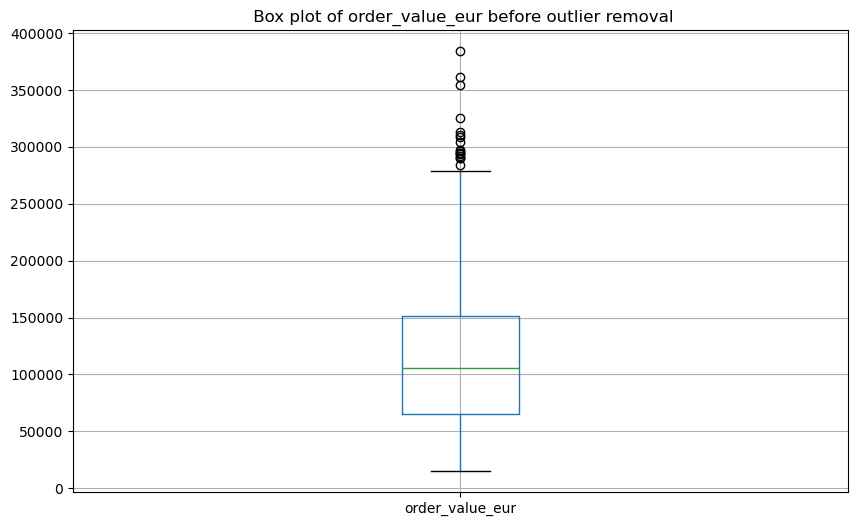

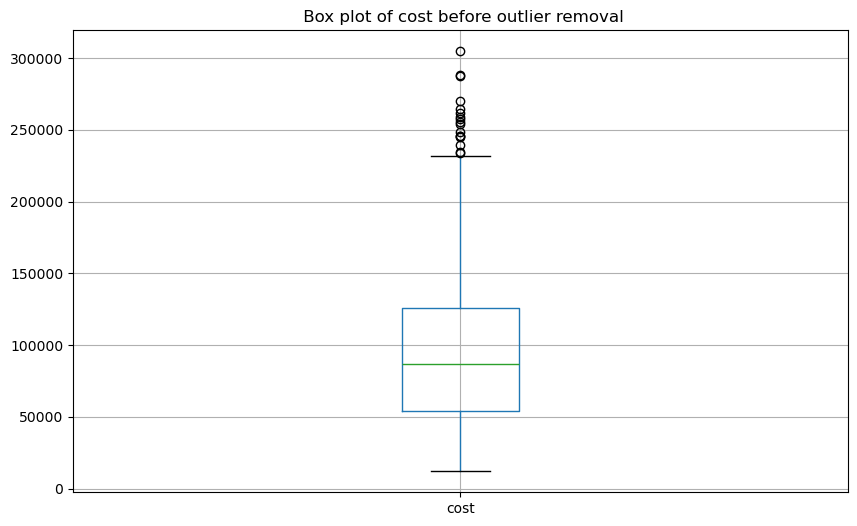

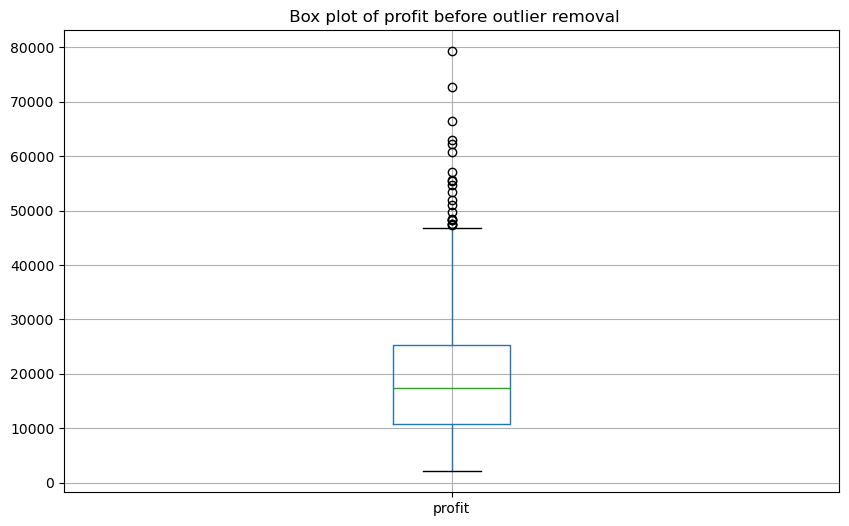

In [32]:
# Visualizing Outliers before outlier removal

num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} before outlier removal")
    plt.show()

In [33]:
Q1 = df['order_value_eur'].quantile(0.25)
Q3 = df['order_value_eur'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['order_value_eur'] < (Q1 - 1.5 * IQR)) | (df['order_value_eur'] > (Q3 + 1.5 * IQR)))]

## Encode Categorical Variables

In [35]:
df = pd.get_dummies(df, columns=['country', 'device_type', 'category'], drop_first=True)

## Scale Numerical Data

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['order_value_eur', 'cost', 'profit']] = scaler.fit_transform(df[['order_value_eur', 'cost', 'profit']])